# Final Project Template

This workbook provides the template for the final project. 

## Instructions
- Work individually or in pairs
- Each team is to complete 1 copy of this template.
  - Complete all sections.
  - Feel free to include supporting material / slides / documents as needed.
- At the end of the project, you will get 15 minutes to present this workbook to the class.

### Submission Instructions
- Submit the .ipynb with the Output cells showing the results
  - Naming convention:
  ```
      <name1>-<name2>-<project_short_name>.ipynb
  ```
- If you provide your own datasets, include the data with your .ipynb, unless it is confidential

## Section 0: Team Members
- Eugene Low

## Section 1: Project Title

- Weather Prediction using historical data

## Section 2: Project Definition

### Goals

Describe the goal of this project.

Example:
The goal of this project is to determine if the bid quotas and premiums can be > used to predict the vehicle category.

Important:
- If this is your first project, keep the project definition as simple as possible. 
- As a rule of thumb, pick something that can be completed in 1 day. But you can always pick a more complex project (no penalty)
- If you are not sure, use the workshop problems as a reference.

### Dataset

Briefly describe the source(s) of data you are using.
- Provide the URL to the data source.
- If you are providing your own data set, include the data with your project submission, unless the data is confidential.
- Describe the attributes of the dataset and the target variable (if any)

### Tasks

List the tasks you will perform. 

Example:
 
1. Process the dataset to convert strings into labels.
2. Shuffle and split into train and test sets
3. Train a classification model, using algorithm A, B, C...
4. Compute the metrics for the algorithm.
5. Perform analysis for possible improvements.

## Section 3: Data Engineering

Consider:
* Data Cleaning
* Data Exploration
* Imbalance / Data Sampling
* Data Encoding

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import pickle
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import homogeneity_completeness_v_measure

%matplotlib inline

In [157]:
df = pd.read_csv('WeatherTempDatasetSimple_Jan2008_Oct2018.csv')
df.info()
# total of 52754 rows of data (10 Columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52754 entries, 0 to 52753
Data columns (total 10 columns):
Station                52754 non-null object
Year                   52754 non-null int64
Month                  52754 non-null int64
Day                    52754 non-null int64
Mean_Temperature       52754 non-null object
Maximum_Temperature    52754 non-null object
Minimum_Temperature    52754 non-null object
Mean_Wind_Speed        52754 non-null object
Max_Wind_Speed         52754 non-null object
Rain                   52754 non-null object
dtypes: int64(3), object(7)
memory usage: 4.0+ MB


In [158]:
df['Mean_Temperature'] = pd.to_numeric(df.Mean_Temperature, errors = 'coerce')
df['Maximum_Temperature'] = pd.to_numeric(df.Maximum_Temperature, errors = 'coerce')
df['Minimum_Temperature'] = pd.to_numeric(df.Minimum_Temperature, errors = 'coerce')
df['Mean_Wind_Speed'] = pd.to_numeric(df.Mean_Wind_Speed, errors = 'coerce')
df['Max_Wind_Speed'] = pd.to_numeric(df.Max_Wind_Speed, errors = 'coerce')
#df.dtypes

In [159]:
# to drop 5141 row due to NaN Values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47613 entries, 0 to 52753
Data columns (total 10 columns):
Station                47613 non-null object
Year                   47613 non-null int64
Month                  47613 non-null int64
Day                    47613 non-null int64
Mean_Temperature       47613 non-null float64
Maximum_Temperature    47613 non-null float64
Minimum_Temperature    47613 non-null float64
Mean_Wind_Speed        47613 non-null float64
Max_Wind_Speed         47613 non-null float64
Rain                   47613 non-null object
dtypes: float64(5), int64(3), object(2)
memory usage: 4.0+ MB


In [160]:
#df['Rain'].unique()

In [161]:
#df['Station'].unique()

In [162]:
le = LabelEncoder()
df['Rain'] = le.fit_transform(df.Rain)
print(le.classes_)
# ['No' = 0 'Yes' = 1]

df['Station'] = le.fit_transform(df.Station)
print(le.classes_)
# ['Admiralty' = 0 'Ang Mo Kio' = 1 'Boon Lay (East)' = 2 'Changi' = 3
# 'Choa Chu Kang (South)' = 4 'Clementi' = 5 'East Coast Parkway' = 6 'Jurong (West)' = 7
# 'Jurong Island' = 8 'Khatib' = 9 'Marina Barrage' = 10 'Newton' = 11 'Pasir Panjang' = 12
# 'Sentosa Island' = 13 'Tai Seng' = 14 'Tuas South' = 15]

['No' 'Yes']
['Admiralty' 'Ang Mo Kio' 'Boon Lay (East)' 'Changi'
 'Choa Chu Kang (South)' 'Clementi' 'East Coast Parkway' 'Jurong (West)'
 'Jurong Island' 'Khatib' 'Marina Barrage' 'Newton' 'Pasir Panjang'
 'Sentosa Island' 'Tai Seng' 'Tuas South']


In [163]:
#df['Rain'].unique()

In [164]:
#df['Station'].unique()

In [165]:
df.corr()

Station      Year     Month       Day  Mean_Temperature  \
Station              1.000000  0.127853  0.007562  0.000327          0.126511   
Year                 0.127853  1.000000 -0.092411 -0.004331          0.133075   
Month                0.007562 -0.092411  1.000000  0.008239          0.023623   
Day                  0.000327 -0.004331  0.008239  1.000000          0.007745   
Mean_Temperature     0.126511  0.133075  0.023623  0.007745          1.000000   
Maximum_Temperature -0.049715  0.082327 -0.067798  0.013169          0.671146   
Minimum_Temperature  0.172595  0.134918  0.017531  0.014090          0.790117   
Mean_Wind_Speed      0.023077  0.060694 -0.157383  0.006278          0.141480   
Max_Wind_Speed      -0.045881 -0.010925 -0.049548  0.010374         -0.152291   
Rain                -0.024285 -0.030713  0.100304 -0.019106         -0.443507   

                     Maximum_Temperature  Minimum_Temperature  \
Station                        -0.049715             0.172595   
Year                            0.082327             0.134918   
Month                          -0.067798             0.017531   
Day                             0.013169             0.014090   
Mean_Temperature                0.671146             0.790117   
Maximum_Temperature             1.000000             0.379957   
Minimum_Temperature             0.379957             1.000000   
Mean_Wind_Speed                -0.121085             0.220850   
Max_Wind_Speed                 -0.186560            -0.255389   
Rain                           -0.279578            -0.472479   

                     Mean_Wind_Speed  Max_Wind_Speed      Rain  
Station                     0.023077       -0.045881 -0.024285  
Year                        0.060694       -0.010925 -0.030713  
Month                      -0.157383       -0.049548  0.100304  
Day                         0.006278        0.010374 -0.019106  
Mean_Temperature            0.141480       -0.152291 -0.443507  
Maximum_Temperature        -0.121085       -0.186560 -0.279578  
Minimum_Temperature         0.220850       -0.255389 -0.472479  
Mean_Wind_Speed             1.000000        0.430186 -0.236191  
Max_Wind_Speed              0.430186        1.000000  0.172097  
Rain                       -0.236191        0.172097  1.000000

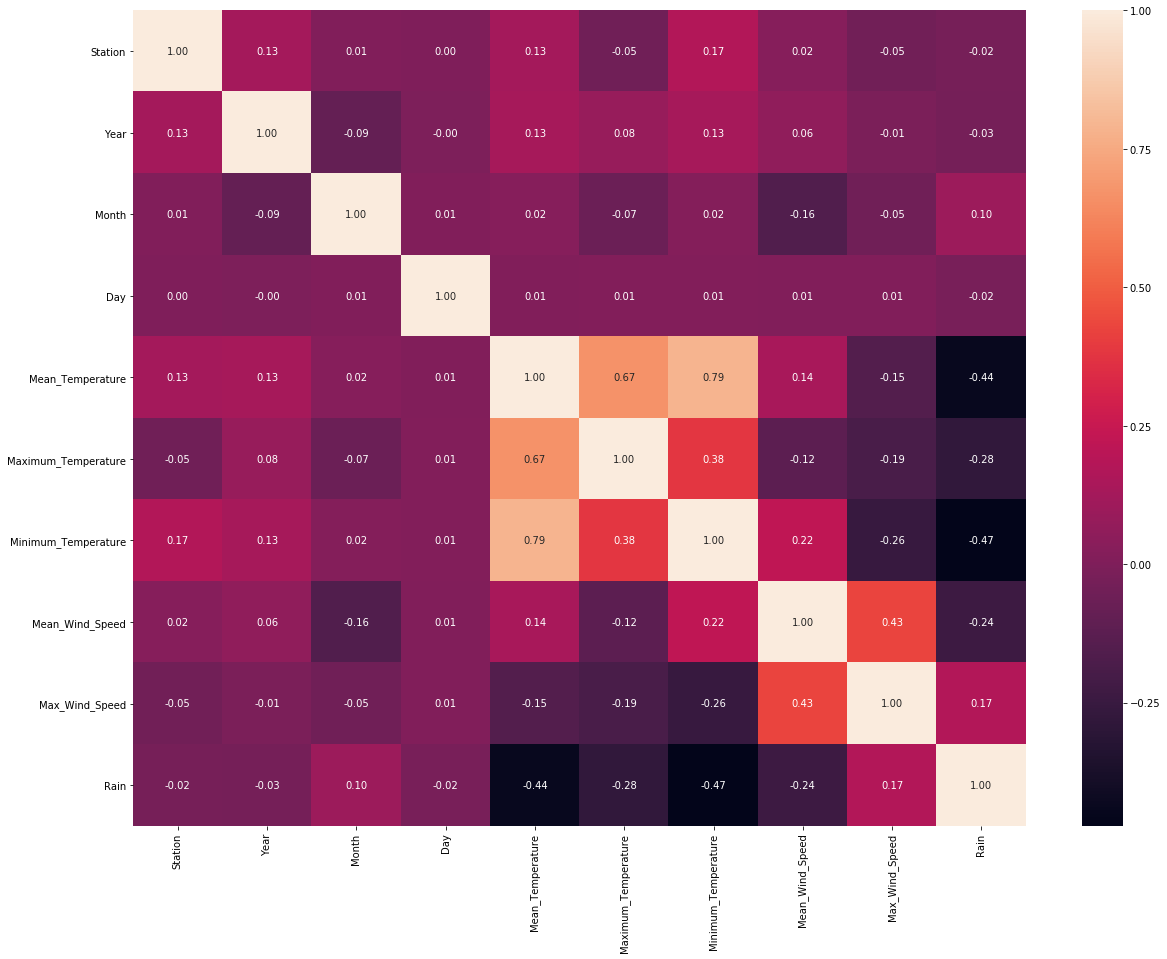

In [166]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax)

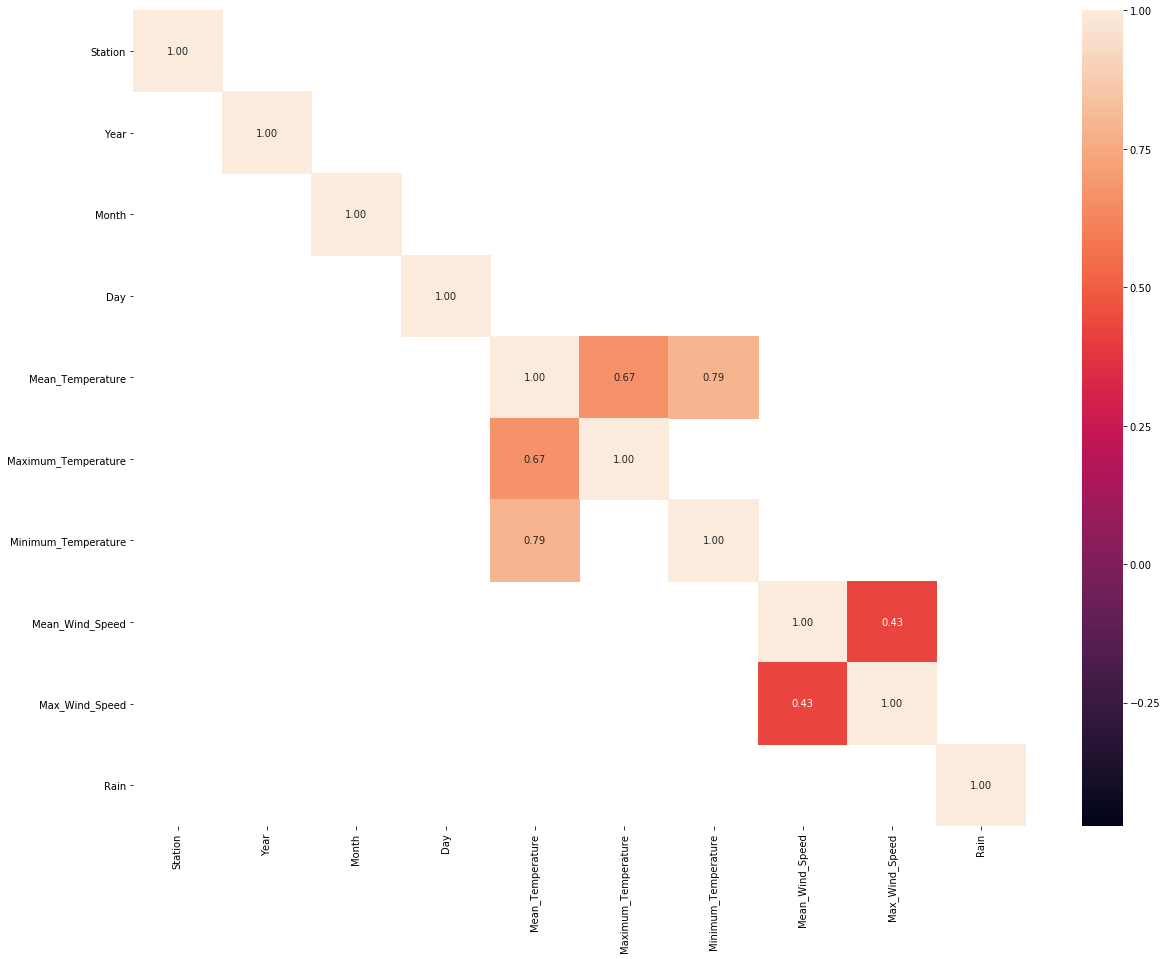

In [214]:
min_corr_threshold = 0.4
corr = df.corr()

# mask out correlations that are below high_threshold
high_corrs = corr[corr > min_corr_threshold]
high_mask = pd.DataFrame(high_corrs).isnull()

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax, mask=high_mask)

## Section 4: Feature Engineering

Consider:
* Feature Reduction
* PCA plot in 2D

In [168]:
target = 'Rain'
features = (df.columns != target) 

In [169]:
X = df.loc[:, features]
y = df.loc[:, target]
print(df.shape, X.shape, y.shape)
print(y.value_counts())

(47613, 10) (47613, 9) (47613,)
1    24789
0    22824
Name: Rain, dtype: int64


In [170]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_2d = PCA(n_components=2)
Z_2d = pca_2d.fit_transform(X_scaled)

#print(sum(pca_2d.explained_variance_ratio_))

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


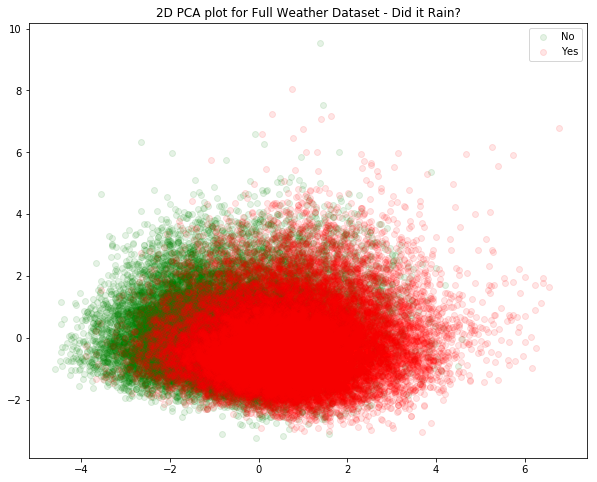

In [171]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(Z_2d[y==0, 0], Z_2d[y==0, 1], color='g', label='No', alpha=.1)
ax.scatter(Z_2d[y==1, 0], Z_2d[y==1, 1], color='r', label='Yes', alpha=.1)


ax.set(title='2D PCA plot for Temperature/Wind Weather Dataset - Did it Rain?')
ax.legend()
plt.show()

[Text(0, 0.5, 'Inter-cluster distance'), Text(0.5, 1.0, 'Dendrogram')]

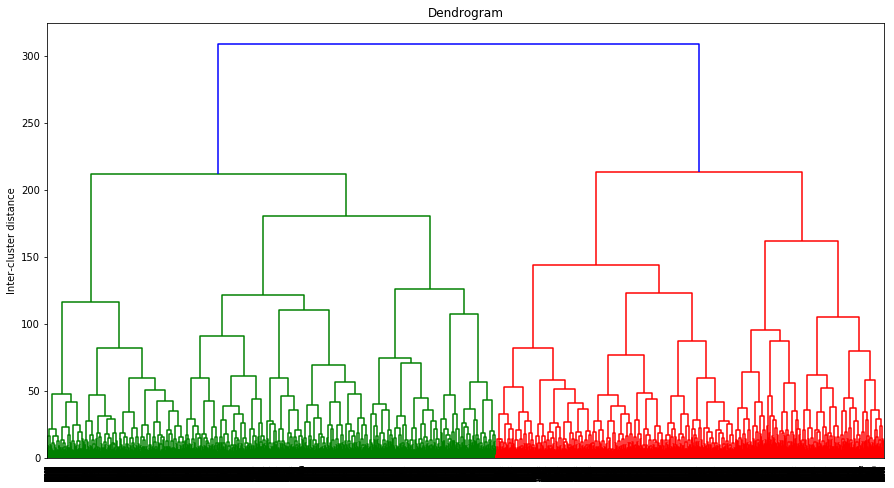

In [172]:
#Cluster analysis for Decision Tree
links = linkage(X_scaled, 'ward')

fig, ax = plt.subplots(figsize=(15, 8))
dendrogram(links, ax=ax)

ax.set(title='Dendrogram', ylabel='Inter-cluster distance')

In [173]:
#agg = AgglomerativeClustering(n_clusters=2)
#clusters = agg.fit_predict(X_scaled)

#from sklearn.metrics import silhouette_score
#print(silhouette_score(X_scaled, clusters))

#print(homogeneity_completeness_v_measure(y, clusters))

In [ ]:
#Prep data for training and validation

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [175]:
#print(df.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#print(y.value_counts())
#print(y_train.value_counts())
#print(y_test.value_counts())

In [176]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)

Z_train = X_scaler.transform(X_train)
Z_test = X_scaler.transform(X_test)

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [177]:
sgd = SGDClassifier(tol=1e-3, random_state=42, max_iter=100)
sgd.fit(Z_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [178]:
svc = SVC(gamma='auto', random_state=42, kernel='rbf')
svc.fit(Z_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [179]:
dtc = DecisionTreeClassifier(random_state=42,max_features='auto',class_weight='balanced')
dtc.fit(Z_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

## Section 5: Model Engineering

Consider:
* Learning Curve to avoid Overfitting

In [180]:
#SGD Learning Curve

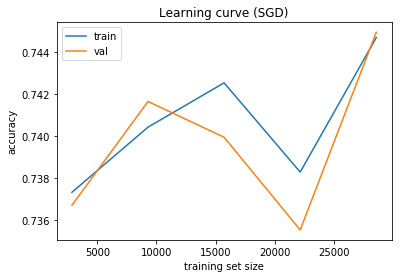

In [181]:
train_sizes, train_scores, val_scores = learning_curve(sgd, Z_train, y_train, cv=5)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores.mean(axis=1), label='train')
ax.plot(train_sizes, val_scores.mean(axis=1), label='val')

# learning curve plots scores (accuracy) vs. training set sizes
ax.set(title='Learning curve (SGD)', xlabel='training set size', ylabel='accuracy')
ax.legend()

In [182]:
#SVC Learning Curve

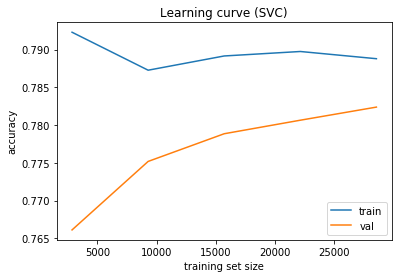

In [183]:
train_sizes, train_scores, val_scores = learning_curve(svc, Z_train, y_train, cv=5)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores.mean(axis=1), label='train')
ax.plot(train_sizes, val_scores.mean(axis=1), label='val')

ax.set(title='Learning curve (SVC)', xlabel='training set size', ylabel='accuracy')
ax.legend()

In [184]:
#Decision Tree Learning Curve

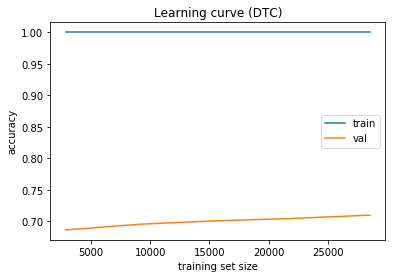

In [185]:
train_sizes, train_scores, val_scores = learning_curve(dtc, Z_train, y_train, cv=5)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores.mean(axis=1), label='train')
ax.plot(train_sizes, val_scores.mean(axis=1), label='val')

# learning curve plots scores (accuracy) vs. training set sizes
ax.set(title='Learning curve (DTC)', xlabel='training set size', ylabel='accuracy')
ax.legend()

## Section 6: Evaluate Metrics

Consider:
* Which metric to use?

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      5830
           1       0.76      0.73      0.74      6074

   micro avg       0.74      0.74      0.74     11904
   macro avg       0.74      0.74      0.74     11904
weighted avg       0.74      0.74      0.74     11904



[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

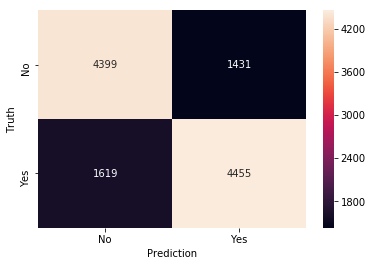

In [186]:
pred_sgd = sgd.predict(Z_test)
print(classification_report(y_test, pred_sgd))

ax = sns.heatmap(confusion_matrix(y_test, pred_sgd), annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      5830
           1       0.81      0.76      0.78      6074

   micro avg       0.78      0.78      0.78     11904
   macro avg       0.78      0.78      0.78     11904
weighted avg       0.79      0.78      0.78     11904



[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

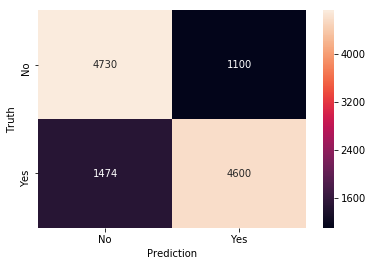

In [187]:
pred_svc = svc.predict(Z_test)
print(classification_report(y_test, pred_svc))

ax = sns.heatmap(confusion_matrix(y_test, pred_svc), annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      5830
           1       0.71      0.72      0.72      6074

   micro avg       0.71      0.71      0.71     11904
   macro avg       0.71      0.71      0.71     11904
weighted avg       0.71      0.71      0.71     11904



[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

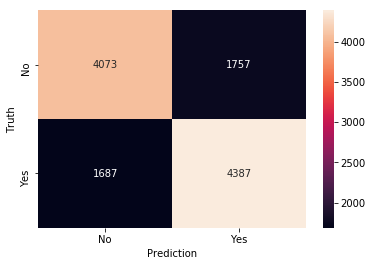

In [188]:
pred_dtc = dtc.predict(Z_test)
print(classification_report(y_test, pred_dtc))

ax = sns.heatmap(confusion_matrix(y_test, pred_dtc), annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [189]:
#pickle.dump(X_scaler, open('Weather_TempData_Simple_X_scaler.pickle', 'wb'))
#pickle.dump(sgd, open('Weather_TempData_Simple_sgd.pickle', 'wb'))
#pickle.dump(svc, open('Weather_TempData_Simple_svc.pickle', 'wb'))
#pickle.dump(dtc, open('Weather_TempData_Simple_dtc.pickle', 'wb'))

In [190]:
#X_scaler_d = pickle.load(open('Weather_TempData_Simple_X_scaler.pickle', 'rb'))
#sgd_d = pickle.load(open('Weather_TempData_Simple_sgd.pickle', 'rb'))
#svc_d = pickle.load(open('Weather_TempData_Simple_svc.pickle', 'rb'))
#dtc_d = pickle.load(open('Weather_TempData_Simple_dtc.pickle', 'rb'))

In [191]:
print(X_test.shape, y_test.shape)
print(y.value_counts())
#print(y_train.value_counts())
print(y_test.value_counts())

(11904, 9) (11904,)
1    24789
0    22824
Name: Rain, dtype: int64
1    6074
0    5830
Name: Rain, dtype: int64


In [192]:
#Validate with SGD

In [193]:
test_data_yes = X_test.loc[y_test == 1]
test_targets_yes = y_test.loc[y_test == 1]

Z_test_yes = X_scaler.transform(test_data_yes)
y_pred_test_yes = sgd.predict(Z_test_yes)

print('Truth', test_targets_yes.values)
print('Predictions', y_pred_test_yes.flatten())
print('Accuracy', accuracy_score(test_targets_yes.values, y_pred_test_yes))

Truth [1 1 1 ... 1 1 1]
Predictions [0 1 1 ... 1 1 1]
Accuracy 0.7334540665130063


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [194]:
test_data_no = X_test.loc[y_test == 0]
test_targets_no = y_test.loc[y_test == 0]

Z_test_no = X_scaler.transform(test_data_no)
y_pred_test_no = sgd.predict(Z_test_no)

print('Truth', test_targets_no.values)
print('Predictions', y_pred_test_no.flatten())
print('Accuracy', accuracy_score(test_targets_no.values, y_pred_test_no))

Truth [0 0 0 ... 0 0 0]
Predictions [0 1 0 ... 1 0 0]
Accuracy 0.7545454545454545


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [195]:
#Validate with SVC

In [196]:
test_data_yes = X_test.loc[y_test == 1]
test_targets_yes = y_test.loc[y_test == 1]

Z_test_yes = X_scaler.transform(test_data_yes)
y_pred_test_yes = svc.predict(Z_test_yes)

print('Truth', test_targets_yes.values)
print('Predictions', y_pred_test_yes.flatten())
print('Accuracy', accuracy_score(test_targets_yes.values, y_pred_test_yes))

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Truth [1 1 1 ... 1 1 1]
Predictions [0 1 1 ... 1 1 1]
Accuracy 0.7573263088574251


In [197]:
test_data_no = X_test.loc[y_test == 0]
test_targets_no = y_test.loc[y_test == 0]

Z_test_no = X_scaler.transform(test_data_no)
y_pred_test_no = svc.predict(Z_test_no)

print('Truth', test_targets_no.values)
print('Predictions', y_pred_test_no.flatten())
print('Accuracy', accuracy_score(test_targets_no.values, y_pred_test_no))

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Truth [0 0 0 ... 0 0 0]
Predictions [0 0 1 ... 0 0 0]
Accuracy 0.8113207547169812


In [198]:
#Validate with DTC

In [199]:
test_data_yes = X_test.loc[y_test == 1]
test_targets_yes = y_test.loc[y_test == 1]

Z_test_yes = X_scaler.transform(test_data_yes)
y_pred_test_yes = dtc.predict(Z_test_yes)

print('Truth', test_targets_yes.values)
print('Predictions', y_pred_test_yes.flatten())
print('Accuracy', accuracy_score(test_targets_yes.values, y_pred_test_yes))

Truth [1 1 1 ... 1 1 1]
Predictions [1 1 1 ... 1 1 1]
Accuracy 0.7222588080342444


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [200]:
test_data_no = X_test.loc[y_test == 0]
test_targets_no = y_test.loc[y_test == 0]

Z_test_no = X_scaler.transform(test_data_no)
y_pred_test_no = dtc.predict(Z_test_no)

print('Truth', test_targets_no.values)
print('Predictions', y_pred_test_no.flatten())
print('Accuracy', accuracy_score(test_targets_no.values, y_pred_test_no))

Truth [0 0 0 ... 0 0 0]
Predictions [0 0 0 ... 0 0 1]
Accuracy 0.6986277873070326


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [201]:
# Prep Live Data

In [202]:
df_t = pd.read_csv('WeatherTempDatasetSimple_Nov2018.csv')
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 10 columns):
Station                431 non-null object
Year                   431 non-null int64
Month                  431 non-null int64
Day                    431 non-null int64
Mean_Temperature       431 non-null float64
Maximum_Temperature    431 non-null float64
Minimum_Temperature    431 non-null float64
Mean_Wind_Speed        431 non-null float64
Max_Wind_Speed         431 non-null float64
Rain                   431 non-null object
dtypes: float64(5), int64(3), object(2)
memory usage: 33.8+ KB


In [203]:
le = LabelEncoder()
df_t['Rain'] = le.fit_transform(df_t.Rain)
print(le.classes_)
# ['No' = 0 'Yes' = 1]

df_t['Station'] = le.fit_transform(df_t.Station)
print(le.classes_)
# ['Admiralty' = 0 'Ang Mo Kio' = 1 'Boon Lay (East)' = 2 'Changi' = 3
# 'Choa Chu Kang (South)' = 4 'Clementi' = 5 'East Coast Parkway' = 6 'Jurong (West)' = 7
# 'Jurong Island' = 8 'Khatib' = 9 'Marina Barrage' = 10 'Newton' = 11 'Pasir Panjang' = 12
# 'Sentosa Island' = 13 'Tai Seng' = 14 'Tuas South' = 15]

['No' 'Yes']
['Admiralty' 'Ang Mo Kio' 'Changi' 'Choa Chu Kang (South)' 'Clementi'
 'East Coast Parkway' 'Jurong (West)' 'Jurong Island' 'Khatib'
 'Marina Barrage' 'Newton' 'Pasir Panjang' 'Sentosa Island' 'Tai Seng'
 'Tuas South']


In [204]:
X_actual = df_t.loc[:, features]
y_actual = df_t.loc[:, target]
print(df_t.shape, X_actual.shape, y_actual.shape)
print(y_actual.value_counts())

(431, 10) (431, 9) (431,)
1    395
0     36
Name: Rain, dtype: int64


In [205]:
#Prediction using SGD

In [206]:
actual_data_no = X_actual.loc[y_actual == 0]
actual_targets_no = y_actual.loc[y_actual == 0]

Z_actual_no = X_scaler.transform(actual_data_no)
y_pred_actual_no = sgd.predict(Z_actual_no)

print('Truth', actual_targets_no.values)
print('Predictions', y_pred_actual_no.flatten())
print('Accuracy', accuracy_score(actual_targets_no.values, y_pred_actual_no))

Truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predictions [0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1]
Accuracy 0.2777777777777778


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [207]:
actual_data_yes = X_actual.loc[y_actual == 1]
actual_targets_yes = y_actual.loc[y_actual == 1]

Z_actual_yes = X_scaler.transform(actual_data_yes)
y_pred_actual_yes = sgd.predict(Z_actual_yes)

print('Truth', actual_targets_yes.values)
print('Predictions', y_pred_actual_yes.flatten())
print('Accuracy', accuracy_score(actual_targets_yes.values, y_pred_actual_yes))

Truth [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predictions [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [208]:
#Prediction using SVC

In [209]:
actual_data_no = X_actual.loc[y_actual == 0]
actual_targets_no = y_actual.loc[y_actual == 0]

Z_actual_no = X_scaler.transform(actual_data_no)
y_pred_actual_no = svc.predict(Z_actual_no)

print('Truth', actual_targets_no.values)
print('Predictions', y_pred_actual_no.flatten())
print('Accuracy', accuracy_score(actual_targets_no.values, y_pred_actual_no))

Truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predictions [0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1]
Accuracy 0.5277777777777778


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [210]:
actual_data_yes = X_actual.loc[y_actual == 1]
actual_targets_yes = y_actual.loc[y_actual == 1]

Z_actual_yes = X_scaler.transform(actual_data_yes)
y_pred_actual_yes = svc.predict(Z_actual_yes)

print('Truth', actual_targets_yes.values)
print('Predictions', y_pred_actual_yes.flatten())
print('Accuracy', accuracy_score(actual_targets_yes.values, y_pred_actual_yes))

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Truth [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predictions [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1

In [211]:
#Prediction using DTC

In [212]:
actual_data_no = X_actual.loc[y_actual == 0]
actual_targets_no = y_actual.loc[y_actual == 0]

Z_actual_no = X_scaler.transform(actual_data_no)
y_pred_actual_no = dtc.predict(Z_actual_no)

print('Truth', actual_targets_no.values)
print('Predictions', y_pred_actual_no.flatten())
print('Accuracy', accuracy_score(actual_targets_no.values, y_pred_actual_no))

Truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predictions [0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1]
Accuracy 0.5


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [213]:
actual_data_yes = X_actual.loc[y_actual == 1]
actual_targets_yes = y_actual.loc[y_actual == 1]

Z_actual_yes = X_scaler.transform(actual_data_yes)
y_pred_actual_yes = dtc.predict(Z_actual_yes)

print('Truth', actual_targets_yes.values)
print('Predictions', y_pred_actual_yes.flatten())
print('Accuracy', accuracy_score(actual_targets_yes.values, y_pred_actual_yes))

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Truth [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predictions [1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0

## Section 7: Observations and analysis

Answer the following questions:
1. What do you conclude from the metrics?

3. What improvements do you propose?